<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/%EC%97%B0%EA%B4%80%EC%84%B1_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##일원 카이제곱 검정

###적합도 검정

In [ ]:
from scipy import stats
import numpy as np

real_data = [4, 6, 17, 16, 8, 9]
exp_data = [10, 10, 10, 10, 10, 10]

chis = stats.chisquare(real_data, exp_data)
print('statistic: %.3f, pvalue: %.3f' %chis)

if chis[1] >= 0.05:
  print('관측치와 기대치는 차이가 없다; 주사위는 게임에 적합하다.')
else:
  print('관측치와 기대치는 차이가 있다; 주사위는 게임에 적합하지 않다.')

statistic: 14.200, pvalue: 0.014
관측치와 기대치는 차이가 있다; 주사위는 게임에 적합하지 않다.


In [ ]:
real_arr = np.array(real_data)
exp_arr = np.array(exp_data)

statistic = sum(((real_arr - exp_arr) ** 2) / exp_arr)
print('검정통계량: %.3f' %statistic)

검정통계량: 14.200


###선호도 분석

In [ ]:
real_data2 = [4, 6, 17, 16, 8, 9]
exp_data2 = [10, 10, 10, 10, 10, 10]

chis2 = stats.chisquare(real_data2, exp_data2)
print('statistic: %.3f, pvalue: %.3f' %chis2)

if chis2[1] >= 0.05:
  print('관측치와 기대치는 차이가 없다; 선호도에 차이가 없다.')
else:
  print('관측치와 기대치는 차이가 있다; 선호도에 차이가 있다.')

statistic: 14.200, pvalue: 0.014
관측치와 기대치는 차이가 있다; 선호도에 차이가 있다.


In [ ]:
real_arr2 = np.array(real_data2)
exp_arr2 = np.array(exp_data2)

statistic = sum(((real_arr2 - exp_arr2) ** 2)/ exp_arr2)
print('검정통계량: %.3f' %statistic)

검정통계량: 14.200


##이원 카이제곱 검정

###독립성 검정

In [ ]:
from scipy import stats
import pandas as pd

smoke = pd.read_csv('/content/smoke.csv')
print(smoke.info())
smoke.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   education  355 non-null    int64
 1   smoking    355 non-null    int64
dtypes: int64(2)
memory usage: 5.7 KB
None


,education,smoking
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
education = smoke.education
smoking = smoke.smoking

print(education.value_counts())
print(smoking.value_counts())

1    211
3     92
2     52
Name: education, dtype: int64
2    141
1    116
3     98
Name: smoking, dtype: int64


In [ ]:
crosstab = pd.crosstab(index = education, columns = smoking)
print(crosstab)

smoking     1   2   3
education            
1          51  92  68
2          22  21   9
3          43  28  21


In [ ]:
chis, pvalue, df, E = stats.chi2_contingency(crosstab)
print('chisq: %.3f, df: %d, pvalue: %.3f' %(chis, df, pvalue))

if pvalue >= 0.05:
  print('교육수준과 흡연율 간에 관련성이 없다.')
else:
  print('교육수준과 흡연율 간에 관련성이 있다.')

chisq: 18.911, df: 4, pvalue: 0.001
교육수준과 흡연율 간에 관련성이 있다.


###동질성 검정

In [ ]:
from scipy import stats
import pandas as pd

data = pd.read_csv('/content/dataset.csv')
data.head()

,resident,gender,job,age,position,price,survey
0,1,1,1.0,46,4.0,4.1,1
1,2,1,2.0,54,1.0,4.2,2
2,4,2,NaN,45,2.0,3.5,2
3,5,1,3.0,62,1.0,5.0,1
4,3,1,2.0,57,NaN,5.4,2


In [ ]:
resident = data.resident
survey = data.survey

print(resident.value_counts())
print(survey.value_counts())

1    102
2     46
5     34
3     22
4     13
Name: resident, dtype: int64
2    87
3    86
4    24
1    14
5     6
Name: survey, dtype: int64


In [ ]:
crosstab = pd.crosstab(index = resident, columns = survey)
print(crosstab)

chis, pvalue, df, E = stats.chi2_contingency(crosstab)
print('chisq: %.3f, df: %d, pvalue: %.3f' %(chis, df, pvalue))

if pvalue >= 0.05:
  print('주거환경에 따라 만족도에 차이가 없다.')
else:
  print('주거환경에 따라 만족도에 차이가 있다.')

survey    1   2   3   4  5
resident                  
1         6  46  33  15  2
2         4  12  24   4  2
3         1   9   9   2  1
4         0   4   8   1  0
5         3  16  12   2  1
chisq: 13.952, df: 16, pvalue: 0.602
주거환경에 따라 만족도에 차이가 없다.


##상관관계 분석

###상관성 분석

In [ ]:
import pandas as pd

score_iq = pd.read_csv('/content/score_iq.csv')
score_iq.head()

,sid,score,iq,academy,game,tv
0,10001,90,140,2,1,0
1,10002,75,125,1,3,3
2,10003,77,120,1,0,4
3,10004,83,135,2,3,2
4,10005,65,105,0,4,4


In [ ]:
corr = score_iq.corr(method = 'pearson')
print(corr)

              sid     score        iq   academy      game        tv
sid      1.000000 -0.014399 -0.007048 -0.004398  0.018806  0.024565
score   -0.014399  1.000000  0.882220  0.896265 -0.298193 -0.819752
iq      -0.007048  0.882220  1.000000  0.671783 -0.031516 -0.585033
academy -0.004398  0.896265  0.671783  1.000000 -0.351315 -0.948551
game     0.018806 -0.298193 -0.031516 -0.351315  1.000000  0.239217
tv       0.024565 -0.819752 -0.585033 -0.948551  0.239217  1.000000


In [ ]:
print(corr['score'])

sid       -0.014399
score      1.000000
iq         0.882220
academy    0.896265
game      -0.298193
tv        -0.819752
Name: score, dtype: float64


<ipython-input-41-bb8b876dfcdc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['game'] = df['game'].astype('category')


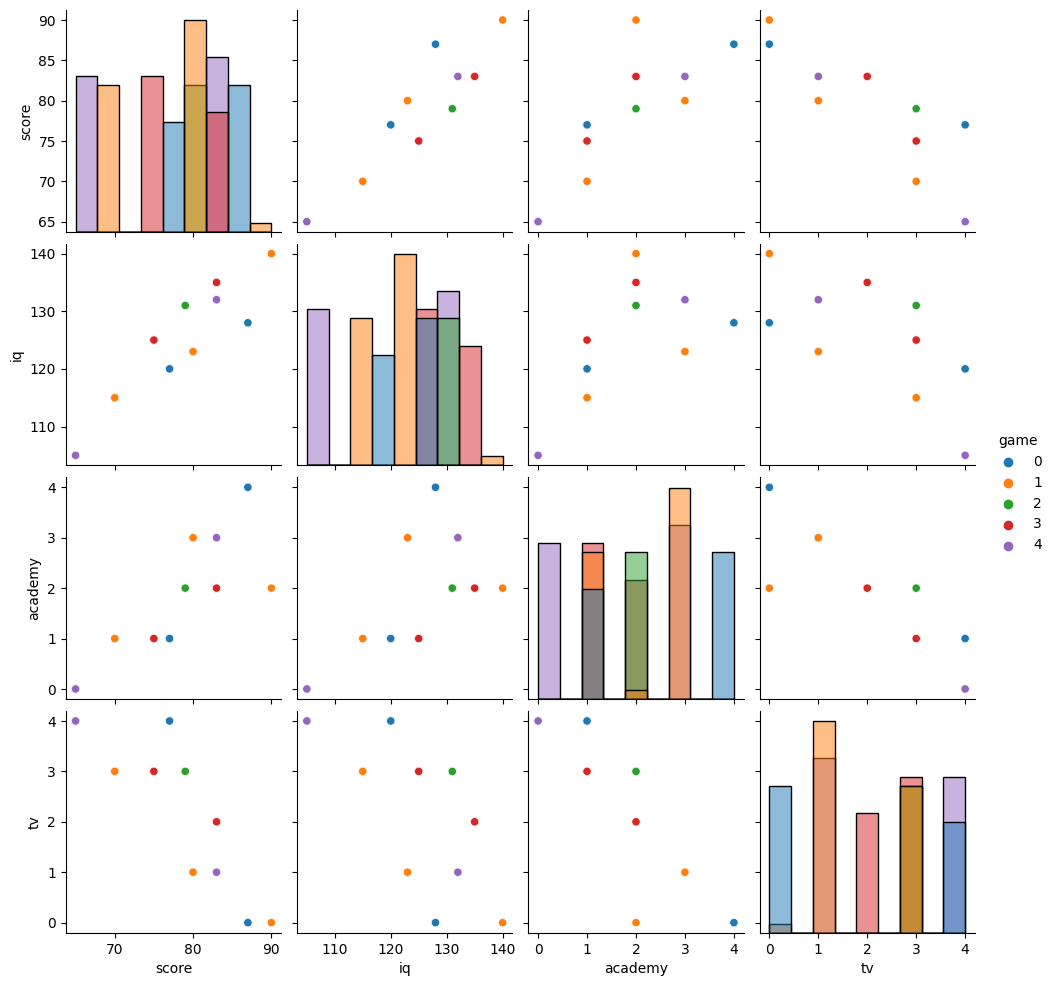

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

cols = ['score', 'iq', 'academy', 'game', 'tv']
df = score_iq[cols]

df['game'] = df['game'].astype('category')

sn.pairplot(data = df, hue = 'game', diag_kind = 'hist')
plt.show()

In [ ]:
cov = score_iq.cov()
print(cov)

                 sid      score         iq   academy      game        tv
sid      1887.500000  -4.100671  -2.718121 -0.231544  1.208054  1.432886
score      -4.100671  42.968412  51.337539  7.119911 -2.890201 -7.214586
iq         -2.718121  51.337539  78.807338  7.227293 -0.413691 -6.972975
academy    -0.231544   7.119911   7.227293  1.468680 -0.629530 -1.543400
game        1.208054  -2.890201  -0.413691 -0.629530  2.186309  0.474899
tv          1.432886  -7.214586  -6.972975 -1.543400  0.474899  1.802640


In [ ]:
print('iq 평균: ', score_iq.iq.mean())
print('academy 평균: ', score_iq.academy.mean())

iq 평균:  123.77333333333333
academy 평균:  1.9666666666666666


##회귀분석

###단순 선형회귀분석

In [1]:
from scipy import stats
import pandas as pd

score_iq = pd.read_csv('/content/score_iq.csv')
score_iq.head()

,sid,score,iq,academy,game,tv
0,10001,90,140,2,1,0
1,10002,75,125,1,3,3
2,10003,77,120,1,0,4
3,10004,83,135,2,3,2
4,10005,65,105,0,4,4
